In [39]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=14, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [40]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

In [41]:
import csv

# TODO: re-add 1 client
clients = {2,3,4,5,6,7,8,9}
latency = {}


for c in clients:
    latency[c]=[] 
    for client in range(0,c-1):
        with open('results/3s'+str(c)+'c/latency_'+str(client)+'.csv', newline='') as csvfile:
            for row in csv.reader(csvfile):
                latency[c].append(int(row[2])/1000000)

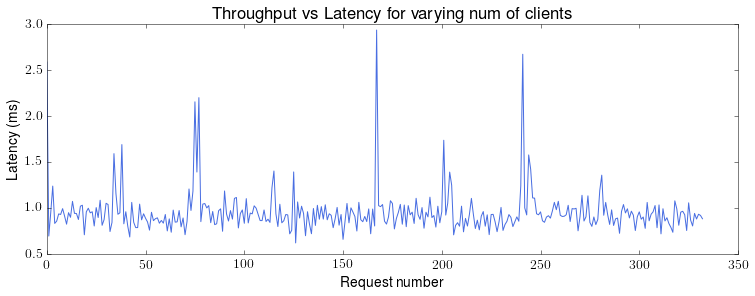

In [42]:
# plotting latency over request time (for 2 client system)

fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Request number')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(latency[5]) 



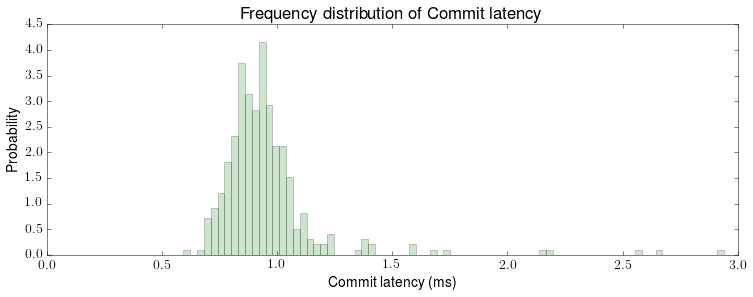

In [43]:
# plot latency distribution (for 5 client system)

fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Probability')
axes.set_title('Frequency distribution of Commit latency')

n, bins, patches = axes.hist(latency[5], 101,range=[0,3],facecolor='green', normed=1, alpha=0.2)



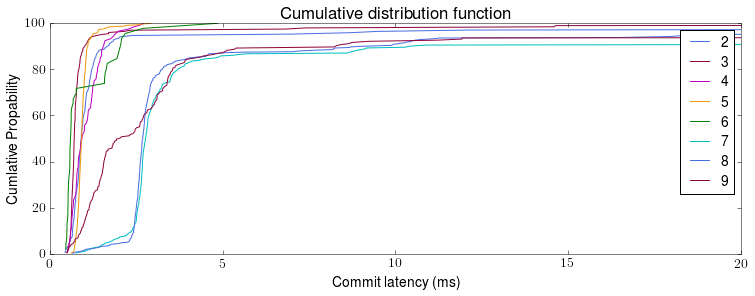

In [44]:
# plot simple CFD

latency_sorted = {}
cdf_y = {}

for c in clients:
    latency_sorted[c] = latency[c]
    latency_sorted[c].sort()
    cdf_y[c]=[]
    size=len(latency_sorted[c])
    for y in range (1,size+1):
        cdf_y[c].append(y*100.0/size)
    

fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Cumulative distribution function')

axes.set_xlim([0,20])
axes.set_ylim([0,100])


for c in clients:
    axes.plot(latency_sorted[c], cdf_y[c])

axes.legend(clients,loc=1,frameon=True)

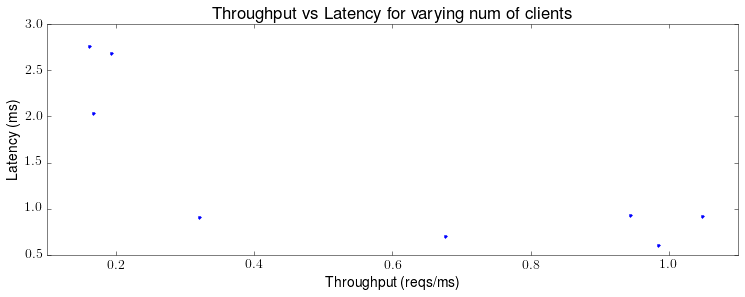

In [45]:
# plotting throughput vs latency

medium_latency=[]
throughput=[]

for c in clients:
    total_latency = np.sum(latency[c])
    number_reqs = len(latency[c])
    throughput.append(number_reqs / total_latency)
    medium_latency.append(np.percentile(latency[c],50))
    
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Throughput (reqs/ms)')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(throughput, medium_latency,"b.") 
